In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
le.fit(iris.species)

LabelEncoder()

In [5]:
iris["species"] = le.transform(iris.species)

In [6]:
from scipy.cluster.hierarchy import linkage

In [7]:
cluster_model = linkage(iris, method="complete")

In [8]:
# cluster_model

In [9]:
from scipy.cluster.hierarchy import dendrogram

In [10]:
import matplotlib.pyplot as plt

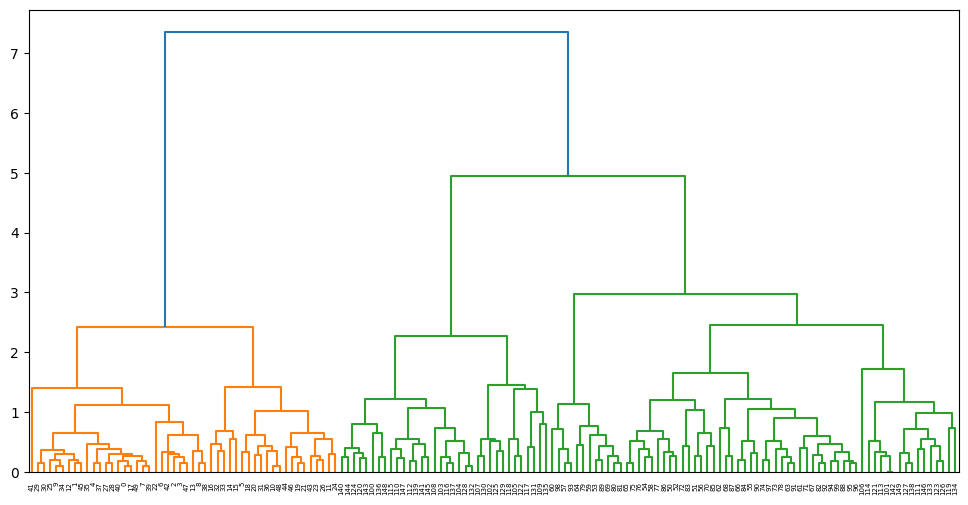

In [11]:
plt.figure(figsize=(12,6))
dendrogram(cluster_model, labels=iris.index)
plt.show()

In [12]:
from scipy.cluster.hierarchy import fcluster

In [13]:
fcluster(cluster_model, 4, criterion="distance")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [14]:
fcluster(cluster_model, 2, criterion="distance")

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 3, 7, 4, 3, 3, 4, 7, 4, 3, 4,
       3, 7, 3, 7, 7, 3, 3, 4, 4, 7, 3, 7, 4, 7, 3, 4, 7, 7, 3, 4, 4, 4,
       3, 7, 7, 4, 3, 3, 7, 3, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7], dtype=int32)

In [15]:
predict = fcluster(cluster_model, 4, criterion="distance")

In [16]:
import numpy as np

In [17]:
adjusted_pred = np.choose((predict-1), [0,2,1])
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
import pandas as pd

In [19]:
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris.species.values)

In [20]:
pd.crosstab(origin_name, pred_name,
            rownames=["True"], colnames=["predicted"],
            margins=True)

predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


In [21]:
import seaborn as sns

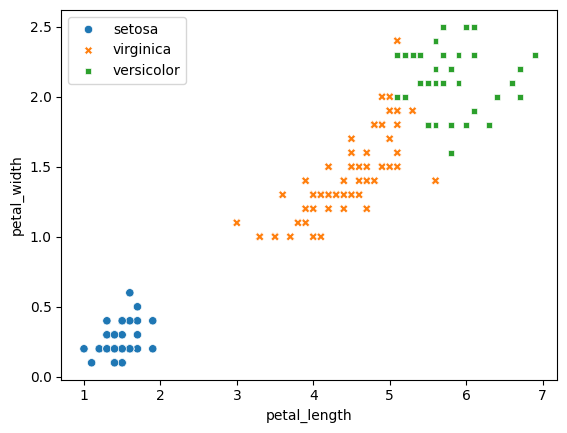

In [22]:
ax = sns.scatterplot(x="petal_length", y="petal_width",
                     hue=le.inverse_transform(predict-1),
                     style=le.inverse_transform(predict-1),
                     data=iris)